---
## Import Libraries
---

In [ ]:
from google.colab import drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


---
## Load Train Data
---

In [ ]:
train_survey = pd.read_csv('Surveydata_train.csv')
train_survey.shape

(94379, 17)

In [ ]:
train_travel = pd.read_csv('Traveldata_train.csv')
train_travel.shape

(94379, 9)

In [ ]:
train = pd.merge(train_travel, train_survey, on='ID')
train.shape

(94379, 25)

---
## Load Test Data
---

In [ ]:
test_survey = pd.read_csv('Surveydata_test.csv')
test_survey.shape

(35602, 16)

In [ ]:
test_travel = pd.read_csv('Traveldata_test.csv')
test_travel.shape

(35602, 9)

In [ ]:
test = pd.merge(test_travel, test_survey, on='ID')
test.shape

(35602, 24)

---
## Data Summary - Train
---

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [ ]:
train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,94379.0,NaN,NaN,NaN,98847190.0,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Gender,94302,2,Female,47815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,85428,2,Loyal Customer,69823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,94346.0,NaN,NaN,NaN,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Type_Travel,85153,2,Business Travel,58617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,94379,2,Eco,49342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,94379.0,NaN,NaN,NaN,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,NaN,NaN,NaN,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,NaN,NaN,NaN,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,NaN,NaN,NaN,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


In [ ]:
train.isnull().sum().sort_values(ascending=False)

Type_Travel                9226
Customer_Type              8951
Arrival_Time_Convenient    8930
Catering                   8741
Onboard_Service            7601
Arrival_Delay_in_Mins       357
Baggage_Handling            142
Online_Support               91
Legroom                      90
CheckIn_Service              77
Gender                       77
Ease_of_Online_Booking       73
Seat_Comfort                 61
Departure_Delay_in_Mins      57
Age                          33
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Cleanliness                   6
Online_Boarding               6
Seat_Class                    0
Overall_Experience            0
Travel_Distance               0
Travel_Class                  0
ID                            0
dtype: int64

In [ ]:
train.shape

(94379, 25)

---
## Data Summary - Test
---

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [ ]:
test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,35602.0,NaN,NaN,NaN,99917801.5,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Gender,35572,2,Female,18069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,32219,2,Loyal Customer,26349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,35591.0,NaN,NaN,NaN,39.446995,15.137554,7.0,27.0,40.0,51.0,85.0
Type_Travel,32154,2,Business Travel,22313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,35602,2,Eco,18473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,35602.0,NaN,NaN,NaN,1987.151761,1024.308863,50.0,1360.0,1929.0,2559.0,6868.0
Departure_Delay_in_Mins,35573.0,NaN,NaN,NaN,14.880696,37.895453,0.0,0.0,0.0,13.0,978.0
Arrival_Delay_in_Mins,35479.0,NaN,NaN,NaN,15.308802,38.531293,0.0,0.0,0.0,13.0,970.0
Seat_Comfort,35580,6,Acceptable,8003,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test.isnull().sum().sort_values(ascending=False)

Type_Travel                3448
Customer_Type              3383
Catering                   3357
Arrival_Time_Convenient    3325
Onboard_Service            2872
Arrival_Delay_in_Mins       123
Baggage_Handling             40
Gender                       30
Departure_Delay_in_Mins      29
Online_Support               26
Legroom                      25
CheckIn_Service              22
Seat_Comfort                 22
Ease_of_Online_Booking       18
Platform_Location            12
Onboard_Wifi_Service         12
Age                          11
Onboard_Entertainment         8
Cleanliness                   2
Online_Boarding               2
Seat_Class                    0
Travel_Distance               0
Travel_Class                  0
ID                            0
dtype: int64

In [ ]:
test.shape

(35602, 24)

---
## Missing Values - Train, Test
---


**1) 8-10% missing**

* Customer_Type
* Arrival_Time_Convenient
* Catering
* Onboard_Service

**2) 0.38% missing**

* Arrival_Dealy_in_Mins

**3) 0.08-0.15% missing**

* Baggage_Handling
* Online_Support
* Legroom
* CheckIn_Service
* Gender
* Ease_of_Online_Booking

**4) 0.01-0.06% missing**
* Seat_Comfort
* Departure_Deplay_in_Mins
* Age
* Platform_Location
* Onboard_Wifi_Service
* Onboard_Entertainment
* Cleanliness
* Online_Boarding


In [ ]:
missing_percent_train = pd.DataFrame(round(train.isnull().sum().sort_values(ascending=False) / train.shape[0] * 100, 2))
missing_percent_train.style.background_gradient()

,0
Type_Travel,9.780000
Customer_Type,9.480000
Arrival_Time_Convenient,9.460000
Catering,9.260000
Onboard_Service,8.050000
Arrival_Delay_in_Mins,0.380000
Baggage_Handling,0.150000
Online_Support,0.100000
Legroom,0.100000
CheckIn_Service,0.080000


In [ ]:
missing_percent_test = pd.DataFrame(round(test.isnull().sum().sort_values(ascending=False) / test.shape[0] * 100, 2))
missing_percent_test.style.background_gradient()

,0
Type_Travel,9.680000
Customer_Type,9.500000
Catering,9.430000
Arrival_Time_Convenient,9.340000
Onboard_Service,8.070000
Arrival_Delay_in_Mins,0.350000
Baggage_Handling,0.110000
Gender,0.080000
Departure_Delay_in_Mins,0.080000
Online_Support,0.070000


---
## Columns per Data Type - Train
---

In [ ]:
survey_cols = train_survey.columns.to_list()
travel_cols = train_travel.columns.to_list()
train_cols = train.columns.to_list()
num_cols = train.select_dtypes('number').columns.to_list()
cat_cols = train.select_dtypes('object').columns.to_list()


---
## Fill in Missing Values - for Numerical_Columns
---

In [ ]:
survey_cols = train_survey.columns.to_list()
travel_cols = train_travel.columns.to_list()
train_cols = train.columns.to_list()
num_cols_train = train.select_dtypes('number').columns.to_list()
cat_cols = train.select_dtypes('object').columns.to_list()

for col in num_cols_train:
  train[col].fillna(train[col].mean(), inplace=True)

train[num_cols].isnull().sum()

ID                         0
Age                        0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Overall_Experience         0
dtype: int64

In [ ]:
# survey_cols = test_survey.columns.to_list()
# travel_cols = test_travel.columns.to_list()
# train_cols = test.columns.to_list()
num_cols_test = test.select_dtypes('number').columns.to_list()
# cat_cols = test.select_dtypes('object').columns.to_list()

for col in num_cols_test:
  test[col].fillna(test[col].mean(), inplace=True)

test[num_cols_test].isnull().sum()

ID                         0
Age                        0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

---
## Fill in Missing Values - for Platform_Location
---

In [ ]:
# train
train['Platform_Location'].fillna(train['Platform_Location'].mode()[0], inplace=True)
train['Platform_Location'].value_counts()

Manageable           24203
Convenient           21912
Needs Improvement    17832
Inconvenient         16449
Very Convenient      13981
Very Inconvenient        2
Name: Platform_Location, dtype: int64

In [ ]:
# test
test['Platform_Location'].fillna(test['Platform_Location'].mode()[0], inplace=True)
test['Platform_Location'].value_counts()

Manageable           9376
Convenient           8178
Needs Improvement    6703
Inconvenient         6134
Very Convenient      5211
Name: Platform_Location, dtype: int64

---
## Fill in Missing Values - for Same Rating Scale
---

### Categorical Columns - Platform_Location

In [ ]:
# Platform_Location -> numeric
train['Platform_Location'].value_counts().index.to_list()

['Manageable',
 'Convenient',
 'Needs Improvement',
 'Inconvenient',
 'Very Convenient',
 'Very Inconvenient']

In [ ]:
# create dictionary
rating_dict2 = {np.nan:0, 'Very Inconvenient':1,'Inconvenient':2, 'Needs Improvement':3,'Manageable':4,'Convenient':5,'Very Convenient':6}

# apply dictionary
train['Platform_Location'] = train['Platform_Location'].map(rating_dict2)
test['Platform_Location'] = test['Platform_Location'].map(rating_dict2)


---
## Create dictionary
---

### Categorical Columns - other rating scale

In [ ]:
cat_cols_others = ['Gender','Customer_Type', 'Type_Travel','Travel_Class', 'Seat_Class','Platform_Location']
cat_cols_others_final = ['Gender','Customer_Type', 'Type_Travel','Travel_Class', 'Seat_Class']

### Categorical Columns - same rating scale

In [ ]:
# train
cat_cols_same_ratings =[]

for col in cat_cols:
  if col not in cat_cols_others:
    cat_cols_same_ratings.append(col)

train[cat_cols_same_ratings]

,Seat_Comfort,Arrival_Time_Convenient,Catering,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,Needs Improvement,Excellent,Excellent,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,Poor,Excellent,Poor,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,Acceptable,Needs Improvement,NaN,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,Acceptable,Acceptable,Acceptable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,Poor,Good,Good,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,Good,Good,Good,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,Needs Improvement,NaN,Needs Improvement,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good


In [ ]:
# test
test[cat_cols_same_ratings]

,Seat_Comfort,Arrival_Time_Convenient,Catering,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,Acceptable,Acceptable,Acceptable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,Extremely Poor,Good,Poor,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,Acceptable,Excellent,Acceptable,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,Excellent,Extremely Poor,Excellent,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,Needs Improvement,Excellent,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
35598,Needs Improvement,Needs Improvement,Good,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
35599,Good,Extremely Poor,Good,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
35600,Excellent,Excellent,Excellent,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good


### Categorical Columns - same rating scale --> Numeric

In [ ]:
# create rating dictionary
rating_dict = {np.nan:0, 'Extremely Poor':1, 'Poor':2, 'Needs Improvement':3, 'Acceptable':4, 'Good':5,  'Excellent':6}

# apply dictionary - train
for col in cat_cols_same_ratings:
  train[col] = train[col].map(rating_dict)

# apply dictionary - test
for col in cat_cols_same_ratings:
  test[col] = test[col].map(rating_dict)


In [ ]:
train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,5,3,4,3,3,4,3,5,3,2
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,5,2,5,5,6,3,2,3,5,5
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,3,5,6,6,6,6,6,5,6,6
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,4,3,4,4,4,4,4,5,4,4
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,3,5,6,5,5,5,5,5,5,5


In [ ]:
# see updated data types - train
train.dtypes.sort_values()

ID                           int64
CheckIn_Service              int64
Baggage_Handling             int64
Legroom                      int64
Onboard_Service              int64
Ease_of_Online_Booking       int64
Online_Support               int64
Onboard_Entertainment        int64
Onboard_Wifi_Service         int64
Platform_Location            int64
Catering                     int64
Cleanliness                  int64
Arrival_Time_Convenient      int64
Seat_Comfort                 int64
Overall_Experience           int64
Travel_Distance              int64
Online_Boarding              int64
Arrival_Delay_in_Mins      float64
Departure_Delay_in_Mins    float64
Age                        float64
Travel_Class                object
Type_Travel                 object
Customer_Type               object
Gender                      object
Seat_Class                  object
dtype: object

In [ ]:
# see updated data types - test
test.dtypes.sort_values()

ID                           int64
CheckIn_Service              int64
Baggage_Handling             int64
Legroom                      int64
Onboard_Service              int64
Ease_of_Online_Booking       int64
Online_Support               int64
Onboard_Entertainment        int64
Onboard_Wifi_Service         int64
Platform_Location            int64
Catering                     int64
Arrival_Time_Convenient      int64
Seat_Comfort                 int64
Travel_Distance              int64
Cleanliness                  int64
Online_Boarding              int64
Arrival_Delay_in_Mins      float64
Departure_Delay_in_Mins    float64
Age                        float64
Seat_Class                  object
Travel_Class                object
Type_Travel                 object
Customer_Type               object
Gender                      object
dtype: object

In [ ]:
# train
train.select_dtypes('object')

,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Class
0,Female,Loyal Customer,NaN,Business,Green Car
1,Male,Loyal Customer,Personal Travel,Eco,Ordinary
2,Female,Loyal Customer,Business Travel,Business,Green Car
3,Female,Loyal Customer,Business Travel,Business,Ordinary
4,Female,Loyal Customer,Business Travel,Business,Ordinary
...,...,...,...,...,...
94374,Male,Loyal Customer,Business Travel,Business,Ordinary
94375,Male,Loyal Customer,Business Travel,Business,Ordinary
94376,Male,NaN,Business Travel,Business,Green Car
94377,Male,Loyal Customer,Personal Travel,Eco,Ordinary


In [ ]:
# test
test.select_dtypes('object')

,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Class
0,Female,NaN,Business Travel,Business,Green Car
1,Female,Disloyal Customer,Business Travel,Business,Ordinary
2,Male,Loyal Customer,Business Travel,Business,Ordinary
3,Female,Loyal Customer,Personal Travel,Eco,Green Car
4,Male,Disloyal Customer,Business Travel,Business,Ordinary
...,...,...,...,...,...
35597,Male,Loyal Customer,Personal Travel,Eco,Green Car
35598,Female,Loyal Customer,Business Travel,Business,Ordinary
35599,Male,Disloyal Customer,Business Travel,Eco,Green Car
35600,Female,Loyal Customer,Personal Travel,Eco,Ordinary


### Plot Categorical Columns

* Train & Test - we have similar distribution for client characteristics. This is good.

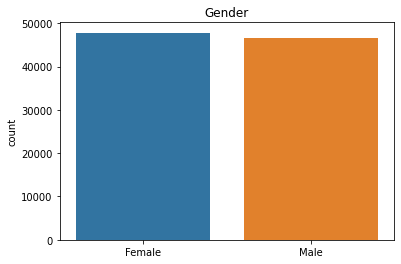

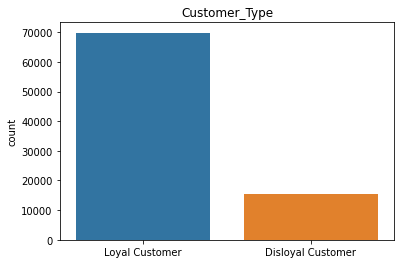

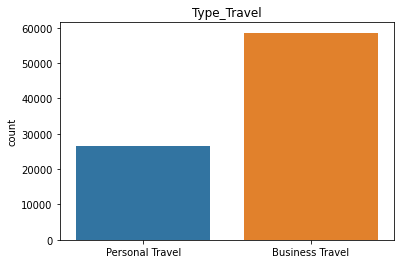

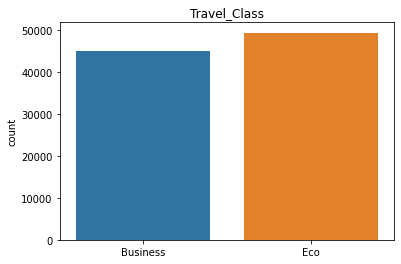

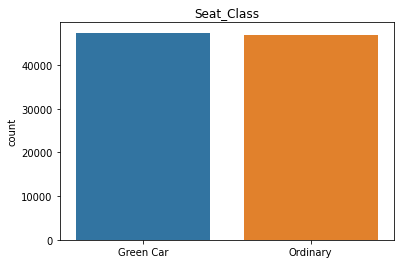

In [ ]:
# train
data = train.select_dtypes('object')
cat_cols = data.columns.to_list()

for col in cat_cols:
  x = col

  sns.countplot(x=x, data=data)  
  plt.title(f"{col}")
  plt.xlabel("")
  plt.show()

In [ ]:
# test
data = test.select_dtypes('object')
cat_cols = data.columns.to_list()

for col in cat_cols:
  x = col

  sns.countplot(x=x, data=data)  
  plt.title(f"{col}")
  plt.xlabel("")
  plt.show()

### Plot Numerical Columns

In [ ]:
# check distribution for numerical columns - train
num_cols = train.select_dtypes('number')

for col in num_cols:
  print(f"{col}:")
  print(f"skew: {round(train[col].skew(), 2)}")
  train[col].hist()
  plt.show()

In [ ]:
# check distribution for numerical columns - test
num_cols = test.select_dtypes('number')

for col in num_cols:
  print(f"{col}:")
  print(f"skew: {round(train[col].skew(), 2)}")
  train[col].hist()
  plt.show()

In [ ]:
train.head()

In [ ]:
test.head()

---
## Fill in Missing Values - for Label Encoding
---

in categorical values:
- missing values only upto 2 
- fill in with most frequent value (mode)

In [ ]:
# train
cat_cols = train.select_dtypes('object').columns.tolist()
cat_cols

['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Class']

In [ ]:
# test
test.select_dtypes('object').columns.tolist()

['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Class']

In [ ]:
# train
for col in cat_cols:
  train[col].fillna(train[col].mode()[0], inplace=True)
  display(train[col].value_counts())
  print()

Female    47892
Male      46487
Name: Gender, dtype: int64

Loyal Customer       78774
Disloyal Customer    15605
Name: Customer_Type, dtype: int64

Business Travel    67843
Personal Travel    26536
Name: Type_Travel, dtype: int64

Eco         49342
Business    45037
Name: Travel_Class, dtype: int64

Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64

In [ ]:
# test
for col in cat_cols:
  test[col].fillna(test[col].mode()[0], inplace=True)
  display(test[col].value_counts())
  print()

Female    18099
Male      17503
Name: Gender, dtype: int64

Loyal Customer       29732
Disloyal Customer     5870
Name: Customer_Type, dtype: int64

Business Travel    25761
Personal Travel     9841
Name: Type_Travel, dtype: int64

Eco         18473
Business    17129
Name: Travel_Class, dtype: int64

Ordinary     17860
Green Car    17742
Name: Seat_Class, dtype: int64

---
## Label Encoding
---

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_train = LabelEncoder()

# train
for col in cat_cols:
  train[f"{col}_num"] = le_train.fit_transform(train[col])
  print(f"{col}: ", le_train.classes_)

Gender:  ['Female' 'Male']
Customer_Type:  ['Disloyal Customer' 'Loyal Customer']
Type_Travel:  ['Business Travel' 'Personal Travel']
Travel_Class:  ['Business' 'Eco']
Seat_Class:  ['Green Car' 'Ordinary']


In [ ]:
# test
for col in cat_cols:
  test[f"{col}_num"] = le_train.fit_transform(test[col])
  print(f"{col}: ", le_train.classes_)

Gender:  ['Female' 'Male']
Customer_Type:  ['Disloyal Customer' 'Loyal Customer']
Type_Travel:  ['Business Travel' 'Personal Travel']
Travel_Class:  ['Business' 'Eco']
Seat_Class:  ['Green Car' 'Ordinary']


In [ ]:
# before & after mapping - train
for col in cat_cols:

  before = train[f"{col}"].value_counts(dropna=False).index.tolist()
  after = train[f"{col}_num"].value_counts(dropna=False).index.tolist()
  before_count = train[f"{col}"].value_counts(dropna=False).values.tolist()
  after_count = train[f"{col}_num"].value_counts(dropna=False).values.tolist()
  
  df = pd.DataFrame([before, after, before_count, after_count]).T.rename(columns={0:'before', 1:'after', 2:'count_before', 3:'count_after'})
  df['after'] = df['after'].astype(int)
  df['count_before'] = df['count_before'].astype(int)
  df['count_after'] = df['count_after'].astype(int)


  print(f"{col}: ")
  print("-"*15)
  display(df.sort_values('after'))
  print()

Gender: 
---------------


,before,after,count_before,count_after
0,Female,0,47892,47892
1,Male,1,46487,46487



Customer_Type: 
---------------


,before,after,count_before,count_after
1,Disloyal Customer,0,15605,15605
0,Loyal Customer,1,78774,78774



Type_Travel: 
---------------


,before,after,count_before,count_after
0,Business Travel,0,67843,67843
1,Personal Travel,1,26536,26536



Travel_Class: 
---------------


,before,after,count_before,count_after
1,Business,0,45037,45037
0,Eco,1,49342,49342



Seat_Class: 
---------------


,before,after,count_before,count_after
0,Green Car,0,47435,47435
1,Ordinary,1,46944,46944


In [ ]:
# before & after mapping - test
for col in cat_cols:

  before = test[f"{col}"].value_counts(dropna=False).index.tolist()
  after = test[f"{col}_num"].value_counts(dropna=False).index.tolist()
  before_count = test[f"{col}"].value_counts(dropna=False).values.tolist()
  after_count = test[f"{col}_num"].value_counts(dropna=False).values.tolist()
  
  df = pd.DataFrame([before, after, before_count, after_count]).T.rename(columns={0:'before', 1:'after', 2:'count_before', 3:'count_after'})
  df['after'] = df['after'].astype(int)
  df['count_before'] = df['count_before'].astype(int)
  df['count_after'] = df['count_after'].astype(int)


  print(f"{col}: ")
  print("-"*15)
  display(df.sort_values('after'))
  print()

Gender: 
---------------


,before,after,count_before,count_after
0,Female,0,18099,18099
1,Male,1,17503,17503



Customer_Type: 
---------------


,before,after,count_before,count_after
1,Disloyal Customer,0,5870,5870
0,Loyal Customer,1,29732,29732



Type_Travel: 
---------------


,before,after,count_before,count_after
0,Business Travel,0,25761,25761
1,Personal Travel,1,9841,9841



Travel_Class: 
---------------


,before,after,count_before,count_after
1,Business,0,17129,17129
0,Eco,1,18473,18473



Seat_Class: 
---------------


,before,after,count_before,count_after
1,Green Car,0,17742,17742
0,Ordinary,1,17860,17860


In [ ]:
# train
train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_num,Customer_Type_num,Type_Travel_num,Travel_Class_num,Seat_Class_num
0,98800001,Female,Loyal Customer,52.0,Business Travel,Business,272,0.0,5.0,0,...,4,3,5,3,2,0,1,0,0,0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,3,2,3,5,5,1,1,1,1,1
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,6,6,5,6,6,0,1,0,0,0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,4,4,5,4,4,0,1,0,0,1
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,5,5,5,5,5,0,1,0,0,1


In [ ]:
# test
test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_num,Customer_Type_num,Type_Travel_num,Travel_Class_num,Seat_Class_num
0,99900001,Female,Loyal Customer,36.0,Business Travel,Business,532,0.0,0.0,4,...,6,6,5,6,2,0,1,0,0,0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,1,...,4,5,4,6,4,0,0,0,0,1
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,6,...,3,3,5,3,6,1,1,0,0,1
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,4,...,3,6,6,6,2,0,1,1,1,0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,6,...,4,6,6,6,6,1,0,0,0,1


In [ ]:
# train
train.select_dtypes('object')

,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Class
0,Female,Loyal Customer,Business Travel,Business,Green Car
1,Male,Loyal Customer,Personal Travel,Eco,Ordinary
2,Female,Loyal Customer,Business Travel,Business,Green Car
3,Female,Loyal Customer,Business Travel,Business,Ordinary
4,Female,Loyal Customer,Business Travel,Business,Ordinary
...,...,...,...,...,...
94374,Male,Loyal Customer,Business Travel,Business,Ordinary
94375,Male,Loyal Customer,Business Travel,Business,Ordinary
94376,Male,Loyal Customer,Business Travel,Business,Green Car
94377,Male,Loyal Customer,Personal Travel,Eco,Ordinary


In [ ]:
# test
test.select_dtypes('object')

---
## **Train - All numeric**
---

In [ ]:
# train all numeric
train = train.select_dtypes('number')

In [ ]:
# no missing values
train.isnull().sum()

ID                         0
Age                        0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Overall_Experience         0
Seat_Comfort               0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender_num                 0
Customer_Type_num          0
Type_Travel_num            0
Travel_Class_num           0
Seat_Class_num             0
dtype: int64

---
## **Test - All numeric**
---

In [ ]:
# test all numeric
test = test.select_dtypes('number')

In [ ]:
# no missing values
test.isnull().sum()

ID                         0
Age                        0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender_num                 0
Customer_Type_num          0
Type_Travel_num            0
Travel_Class_num           0
Seat_Class_num             0
dtype: int64

--- 
## Export to CSV
---

**Data_Checkpoint Summary:**

- Missing Values filled with 'mode', 'mean'
- Ratings (low: worst, high: best)
- label_encoding (in alphabetical order: 0,1,2...)

In [ ]:
train.to_csv('train_numeric.csv')

In [ ]:
test.to_csv('test_numeric.csv')

In [ ]:
train.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,...,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_num,Customer_Type_num,Type_Travel_num,Travel_Class_num,Seat_Class_num
0,98800001,52.0,272,0.0,5.0,0,3,6,6,6,...,4,3,5,3,2,0,1,0,0,0
1,98800002,48.0,2200,9.0,0.0,0,2,6,2,3,...,3,2,3,5,5,1,1,1,1,1
2,98800003,43.0,1061,77.0,119.0,1,3,3,3,3,...,6,6,5,6,6,0,1,0,0,0
3,98800004,44.0,780,13.0,18.0,0,4,3,0,3,...,4,4,5,4,4,0,1,0,0,1
4,98800005,50.0,1981,0.0,0.0,1,4,4,4,4,...,5,5,5,5,5,0,1,0,0,1


In [ ]:
test.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,...,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_num,Customer_Type_num,Type_Travel_num,Travel_Class_num,Seat_Class_num
0,99900001,36.0,532,0.0,0.0,4,4,4,4,3,...,6,6,5,6,2,0,1,0,0,0
1,99900002,21.0,1425,9.0,28.0,1,5,2,4,4,...,4,5,4,6,4,0,0,0,0,1
2,99900003,60.0,2832,0.0,0.0,6,6,6,6,6,...,3,3,5,3,6,1,1,0,0,1
3,99900004,29.0,1352,0.0,0.0,4,6,4,6,2,...,3,6,6,6,2,0,1,1,1,0
4,99900005,18.0,1610,17.0,0.0,6,1,6,3,6,...,4,6,6,6,6,1,0,0,0,1


---
## Sample Submission
---

- 35,602 rows

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/MIT Hackathon - Deep Learners/Sample Submission/Sample_Submission.csv')
sample_submission.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,0
2,99900003,0
3,99900004,0
4,99900005,1


---
## Scale Data
---

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)

In [ ]:
train_scaled = pd.DataFrame(train_scaled, columns = train.columns.tolist())
train_scaled.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,...,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_num,Customer_Type_num,Type_Travel_num,Travel_Class_num,Seat_Class_num
0,-1.732032,0.832369,-1.660469,-0.384165,-0.260781,-1.098107,-0.599578,1.278104,1.412791,1.536013,...,-0.368521,-1.444482,0.522282,-1.478262,-1.811064,-0.985222,0.445082,-0.625411,-1.046703,-0.994811
1,-1.731996,0.567712,0.215099,-0.148112,-0.391103,-1.098107,-1.316175,1.278104,-0.844618,-0.757533,...,-1.138327,-2.299347,-1.057656,0.257012,0.499335,1.014999,0.445082,1.598950,0.955380,1.005216
2,-1.731959,0.236891,-0.892926,1.635398,2.710567,0.910658,-0.599578,-0.330917,-0.280266,-0.757533,...,1.171092,1.120114,0.522282,1.124649,1.269468,-0.985222,0.445082,-0.625411,-1.046703,-0.994811
3,-1.731922,0.303056,-1.166284,-0.043200,0.078057,-1.098107,0.117020,-0.330917,-1.973322,-0.757533,...,-0.368521,-0.589617,0.522282,-0.610625,-0.270798,-0.985222,0.445082,-0.625411,-1.046703,1.005216
4,-1.731886,0.700041,0.002054,-0.384165,-0.391103,0.910658,0.117020,0.205423,0.284087,0.006983,...,0.401286,0.265248,0.522282,0.257012,0.499335,-0.985222,0.445082,-0.625411,-1.046703,1.005216


In [ ]:
test_scaled = pd.DataFrame(test_scaled, columns = test.columns.tolist())
test_scaled.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,...,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_num,Customer_Type_num,Type_Travel_num,Travel_Class_num,Seat_Class_num
0,-1.732002,-0.227750,-1.420638,-0.392843,-0.398002,0.118687,0.207316,0.288926,0.008010,-0.947704,...,1.164328,1.124331,0.525375,1.119188,-1.809802,-0.983397,0.444331,-0.618071,-1.038491,-1.003320
1,-1.731905,-1.218830,-0.548819,-0.155248,0.329949,-2.029869,0.745633,-0.838035,0.008010,-0.189635,...,-0.378345,0.266714,-0.265108,1.119188,-0.272289,-0.983397,-2.250573,-0.618071,-1.038491,0.996691
2,-1.731808,1.357978,0.824810,-0.392843,-0.398002,1.551058,1.283949,1.415886,1.545325,1.326505,...,-1.149682,-1.448521,0.525375,-1.486558,1.265225,1.016883,0.444331,-0.618071,-1.038491,0.996691
3,-1.731710,-0.690254,-0.620087,-0.392843,-0.398002,0.118687,1.283949,0.288926,1.545325,-1.705774,...,-1.149682,1.124331,1.315859,1.119188,-1.809802,-0.983397,0.444331,1.617938,0.962936,-1.003320
4,-1.731613,-1.417046,-0.368206,0.055949,-0.398002,1.551058,-1.407634,1.415886,-0.760648,1.326505,...,-0.378345,1.124331,1.315859,1.119188,1.265225,1.016883,-2.250573,-0.618071,-1.038491,0.996691


In [ ]:
train_scaled.describe()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
count,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04,9.437900e+04
mean,-9.636622e-17,-1.766212e-16,-4.042864e-17,-7.528611e-20,-2.951215e-17,1.325035e-17,4.968883e-18,4.471995e-17,1.852038e-17,-1.196673e-16,-1.954427e-16,-7.596368e-17,1.436459e-16,1.648766e-16,7.965270e-17,3.007303e-16,1.240715e-16,-3.044570e-16,1.268571e-17,-1.775246e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.732032e+00,-2.145021e+00,-1.876431e+00,-3.841653e-01,-3.911028e-01,-1.098107e+00,-2.749370e+00,-1.939939e+00,-1.973322e+00,-2.286563e+00,-3.213739e+00,-3.251914e+00,-3.433280e+00,-3.407218e+00,-2.389402e+00,-3.447747e+00,-4.009078e+00,-3.427563e+00,-4.081174e+00,-3.351330e+00
25%,-8.660162e-01,-8.217363e-01,-6.030301e-01,-3.841653e-01,-3.911028e-01,-1.098107e+00,-5.995778e-01,-8.672577e-01,-8.446176e-01,-7.575327e-01,-9.435492e-01,-1.025427e+00,-3.915418e-01,-1.118780e+00,-6.456245e-01,-1.138327e+00,-5.896169e-01,-2.676867e-01,-6.106252e-01,-1.040931e+00
50%,0.000000e+00,3.839862e-02,-5.436829e-02,-3.841653e-01,-3.911028e-01,9.106583e-01,1.170197e-01,2.054232e-01,2.840865e-01,6.982615e-03,-1.868192e-01,4.588984e-01,3.688929e-01,4.068458e-01,5.168938e-01,4.012857e-01,2.652483e-01,-2.676867e-01,2.570120e-01,4.993352e-01
75%,8.660162e-01,7.662050e-01,5.439066e-01,-6.942817e-02,-5.226501e-02,9.106583e-01,8.336172e-01,7.417636e-01,8.484386e-01,7.714980e-01,5.699108e-01,4.588984e-01,1.129327e+00,1.169659e+00,5.168938e-01,1.171092e+00,1.120114e+00,5.222824e-01,1.124649e+00,4.993352e-01
max,1.732032e+00,3.015789e+00,4.836894e+00,4.137096e+01,4.089498e+01,9.106583e-01,1.550215e+00,1.278104e+00,1.412791e+00,1.536013e+00,1.326641e+00,1.201061e+00,1.129327e+00,1.169659e+00,1.098153e+00,1.171092e+00,1.120114e+00,1.312251e+00,1.124649e+00,1.269468e+00


---
## Correlations
---

In [ ]:
# train

corr = train_scaled.drop(columns='ID').corr()

plt.figure(figsize=(13,10))
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.savefig('/content/drive/MyDrive/MIT Hackathon - Deep Learners/Data_Checkpoint/train_corr.png')
plt.show()

In [ ]:
# test

corr = test_scaled.drop(columns='ID').corr()

plt.figure(figsize=(13,10))
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.savefig('/content/drive/MyDrive/MIT Hackathon - Deep Learners/Data_Checkpoint/test_corr.png')
plt.show()

In [ ]:
#Remove ID columns out of the train, test, train_scaled and test_scaled
train = train.drop(['ID'], axis=1)
test = test.drop(['ID'], axis=1)
train_scaled = train_scaled.drop(['ID'], axis=1)
test_scaled = test_scaled.drop(['ID'], axis=1)

In [ ]:
test.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,...,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_num,Customer_Type_num,Type_Travel_num,Travel_Class_num,Seat_Class_num
0,36.0,532,0.0,0.0,4,4,4,4,3,6,...,6,6,5,6,2,0,1,0,0,0
1,21.0,1425,9.0,28.0,1,5,2,4,4,2,...,4,5,4,6,4,0,0,0,0,1
2,60.0,2832,0.0,0.0,6,6,6,6,6,6,...,3,3,5,3,6,1,1,0,0,1
3,29.0,1352,0.0,0.0,4,6,4,6,2,4,...,3,6,6,6,2,0,1,1,1,0
4,18.0,1610,17.0,0.0,6,1,6,3,6,6,...,4,6,6,6,6,1,0,0,0,1


---
## Train, Validation Split
---

**Copy train and test data**

In [ ]:
train_cp = train.copy()
test_cp = test.copy()
train_cp['Overall_Experience']

0        0
1        0
2        1
3        0
4        1
        ..
94374    0
94375    1
94376    1
94377    0
94378    0
Name: Overall_Experience, Length: 94379, dtype: int64

In [ ]:
#Separating the independent(X) and dependent(Y). The Overall_Experience is the target variables
y = train_cp['Overall_Experience']
X = train_cp.drop(['Overall_Experience'], axis=1)

In [ ]:
#Scaling the independent variables
scale = StandardScaler()

X_scaled = scale.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [ ]:
X_scaled.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,...,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_num,Customer_Type_num,Type_Travel_num,Travel_Class_num,Seat_Class_num
0,-1.732032,0.832369,-1.660469,-0.384165,-0.260781,-0.599578,1.278104,1.412791,1.536013,0.569911,...,-0.368521,-1.444482,0.522282,-1.478262,-1.811064,-0.985222,0.445082,-0.625411,-1.046703,-0.994811
1,-1.731996,0.567712,0.215099,-0.148112,-0.391103,-1.316175,1.278104,-0.844618,-0.757533,0.569911,...,-1.138327,-2.299347,-1.057656,0.257012,0.499335,1.014999,0.445082,1.598950,0.955380,1.005216
2,-1.731959,0.236891,-0.892926,1.635398,2.710567,-0.599578,-0.330917,-0.280266,-0.757533,-0.943549,...,1.171092,1.120114,0.522282,1.124649,1.269468,-0.985222,0.445082,-0.625411,-1.046703,-0.994811
3,-1.731922,0.303056,-1.166284,-0.043200,0.078057,0.117020,-0.330917,-1.973322,-0.757533,-0.186819,...,-0.368521,-0.589617,0.522282,-0.610625,-0.270798,-0.985222,0.445082,-0.625411,-1.046703,1.005216
4,-1.731886,0.700041,0.002054,-0.384165,-0.391103,0.117020,0.205423,0.284087,0.006983,-0.943549,...,0.401286,0.265248,0.522282,0.257012,0.499335,-0.985222,0.445082,-0.625411,-1.046703,1.005216


In [ ]:
#Split data into 70% test and 30% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [ ]:
#Check shape of train and test
print(X_train.shape)
print(X_test.shape)

(66065, 24)
(28314, 24)


**Create the function to calculate and print the classification report and the confusion matriz, so that we don't have to rewrite the same code**

In [ ]:
# Metrics to evaluate the model
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_recall_curve

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV 
#GridSearchCV is a technique to search through the best parameter values from 
#the given set if the grid parameters.

In [ ]:
def metrics_score(actual, predicted):
  print(classification_report(actual, predicted))
  
  cm = confusion_matrix(actual, predicted)

  plt.figure(figsize=(8,5))

  sns.heatmap(cm, annot=True, fmt ='.2f', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])

  plt.ylabel('Actual')

  plt.xlabel('Predicted')

  plt.show()

**Logistic regression model**

In [ ]:
#Create logistic regression model
from sklearn.linear_model import LogisticRegression
Logis_model = LogisticRegression()

**Fit the model**

In [ ]:
Logis_model.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.81      0.80      0.81     29999
           1       0.84      0.85      0.84     36066

    accuracy                           0.83     66065
   macro avg       0.83      0.83      0.83     66065
weighted avg       0.83      0.83      0.83     66065



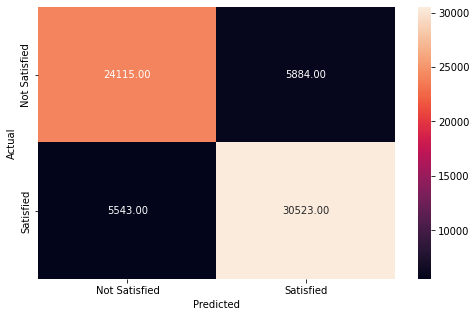

In [ ]:
#Model performance on train
y_pred_train = Logis_model.predict(X_train)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     12787
           1       0.84      0.85      0.85     15527

    accuracy                           0.83     28314
   macro avg       0.83      0.83      0.83     28314
weighted avg       0.83      0.83      0.83     28314



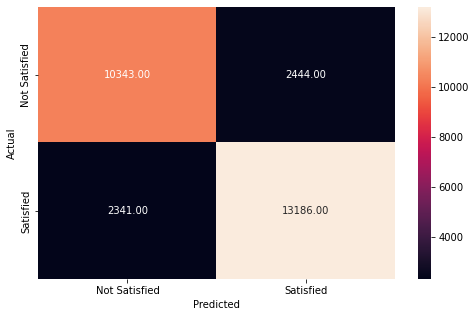

In [ ]:
#Model performance on test
y_pred_test = Logis_model.predict(X_test)

metrics_score(y_test, y_pred_test)

**Observation**  
* model is not overfitting beacuse the accuracy on testing and on training are similar which is about 83%  
* the performance need to still be improved

**Checking cofficients and find which variables are leading satisfaction**

In [ ]:
#Printing coefficient for logistic regression
cols = X.columns
coef_logis = Logis_model.coef_

pd.DataFrame(coef_logis, columns= cols).T.sort_values(by = 0, ascending = False)

,0
Onboard_Entertainment,0.919487
Customer_Type_num,0.638372
Ease_of_Online_Booking,0.443068
CheckIn_Service,0.356552
Legroom,0.292288
Seat_Comfort,0.260303
Online_Boarding,0.193673
Onboard_Service,0.168191
Baggage_Handling,0.136000
Cleanliness,0.127193


In [ ]:
#Convert the logodd into odd by taking its potential
odds = np.exp(Logis_model.coef_[0])

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, X_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

,odds
Onboard_Entertainment,2.508004
Customer_Type_num,1.893396
Ease_of_Online_Booking,1.557478
CheckIn_Service,1.428395
Legroom,1.339489
Seat_Comfort,1.297323
Online_Boarding,1.213699
Onboard_Service,1.183163
Baggage_Handling,1.145682
Cleanliness,1.135636


**Onboard_Entertainment are the lead for satisfaction, Therefore the entertainment is important for people who took a train to be satisfied.**  
**Customer type is also another factor to be satisfy or not**

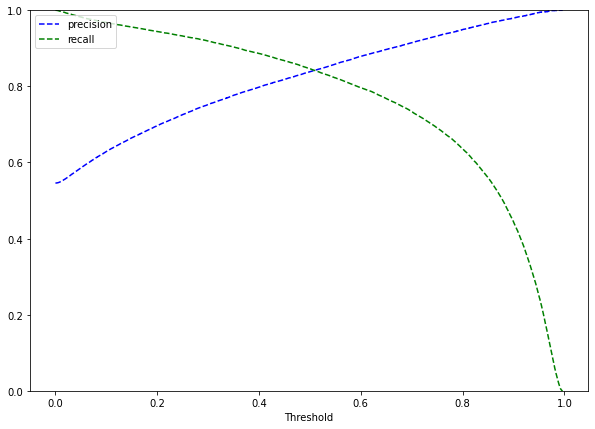

In [ ]:
#Precision recall curve for logistic regression
y_scores_lg = Logis_model.predict_proba(X_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

              precision    recall  f1-score   support

           0       0.80      0.84      0.82     29999
           1       0.86      0.82      0.84     36066

    accuracy                           0.83     66065
   macro avg       0.83      0.83      0.83     66065
weighted avg       0.83      0.83      0.83     66065



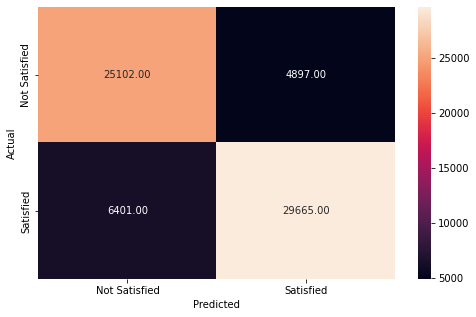

In [ ]:
#from the curve the intersect between prevcision and recall is about 0.5
optimal_threshold1 = .55

y_pred_train = Logis_model.predict_proba(X_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

**With treshold 0.55, the model % recall of the model improved**


**Now, using the this Logis_model to predict the new data, which store as test**

              precision    recall  f1-score   support

           0       0.80      0.84      0.82     12787
           1       0.86      0.82      0.84     15527

    accuracy                           0.83     28314
   macro avg       0.83      0.83      0.83     28314
weighted avg       0.83      0.83      0.83     28314



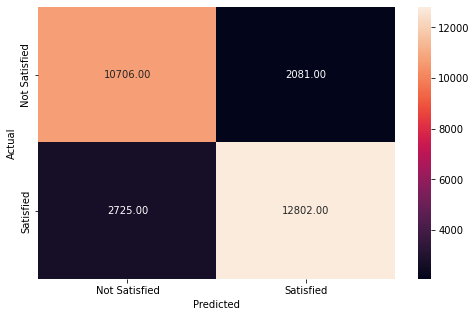

In [ ]:
#Let check with test data
optimal_threshold1 = .55

y_pred_test = Logis_model.predict_proba(X_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

In [ ]:
test_scaled.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,...,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_num,Customer_Type_num,Type_Travel_num,Travel_Class_num,Seat_Class_num
0,-0.227750,-1.420638,-0.392843,-0.398002,0.118687,0.207316,0.288926,0.008010,-0.947704,1.199515,...,1.164328,1.124331,0.525375,1.119188,-1.809802,-0.983397,0.444331,-0.618071,-1.038491,-1.003320
1,-1.218830,-0.548819,-0.155248,0.329949,-2.029869,0.745633,-0.838035,0.008010,-0.189635,-1.771070,...,-0.378345,0.266714,-0.265108,1.119188,-0.272289,-0.983397,-2.250573,-0.618071,-1.038491,0.996691
2,1.357978,0.824810,-0.392843,-0.398002,1.551058,1.283949,1.415886,1.545325,1.326505,1.199515,...,-1.149682,-1.448521,0.525375,-1.486558,1.265225,1.016883,0.444331,-0.618071,-1.038491,0.996691
3,-0.690254,-0.620087,-0.392843,-0.398002,0.118687,1.283949,0.288926,1.545325,-1.705774,-0.285778,...,-1.149682,1.124331,1.315859,1.119188,-1.809802,-0.983397,0.444331,1.617938,0.962936,-1.003320
4,-1.417046,-0.368206,0.055949,-0.398002,1.551058,-1.407634,1.415886,-0.760648,1.326505,1.199515,...,-0.378345,1.124331,1.315859,1.119188,1.265225,1.016883,-2.250573,-0.618071,-1.038491,0.996691


In [ ]:
#Predict test data
test_predict = Logis_model.predict(test_scaled)
test_predict

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
test_scaled['Overall_Experience'] = test_predict

In [ ]:
test_scaled.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,...,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_num,Customer_Type_num,Type_Travel_num,Travel_Class_num,Seat_Class_num,Overall_Experience
0,-0.227750,-1.420638,-0.392843,-0.398002,0.118687,0.207316,0.288926,0.008010,-0.947704,1.199515,...,1.124331,0.525375,1.119188,-1.809802,-0.983397,0.444331,-0.618071,-1.038491,-1.003320,1
1,-1.218830,-0.548819,-0.155248,0.329949,-2.029869,0.745633,-0.838035,0.008010,-0.189635,-1.771070,...,0.266714,-0.265108,1.119188,-0.272289,-0.983397,-2.250573,-0.618071,-1.038491,0.996691,0
2,1.357978,0.824810,-0.392843,-0.398002,1.551058,1.283949,1.415886,1.545325,1.326505,1.199515,...,-1.448521,0.525375,-1.486558,1.265225,1.016883,0.444331,-0.618071,-1.038491,0.996691,1
3,-0.690254,-0.620087,-0.392843,-0.398002,0.118687,1.283949,0.288926,1.545325,-1.705774,-0.285778,...,1.124331,1.315859,1.119188,-1.809802,-0.983397,0.444331,1.617938,0.962936,-1.003320,0
4,-1.417046,-0.368206,0.055949,-0.398002,1.551058,-1.407634,1.415886,-0.760648,1.326505,1.199515,...,1.124331,1.315859,1.119188,1.265225,1.016883,-2.250573,-0.618071,-1.038491,0.996691,1


In [ ]:
#Copy the test_scale with prediction to Submit_logis.csv file
submit_logis = test_scaled.copy()

In [ ]:
submit_logis.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,...,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_num,Customer_Type_num,Type_Travel_num,Travel_Class_num,Seat_Class_num,Overall_Experience
0,-0.227750,-1.420638,-0.392843,-0.398002,0.118687,0.207316,0.288926,0.008010,-0.947704,1.199515,...,1.124331,0.525375,1.119188,-1.809802,-0.983397,0.444331,-0.618071,-1.038491,-1.003320,1
1,-1.218830,-0.548819,-0.155248,0.329949,-2.029869,0.745633,-0.838035,0.008010,-0.189635,-1.771070,...,0.266714,-0.265108,1.119188,-0.272289,-0.983397,-2.250573,-0.618071,-1.038491,0.996691,0
2,1.357978,0.824810,-0.392843,-0.398002,1.551058,1.283949,1.415886,1.545325,1.326505,1.199515,...,-1.448521,0.525375,-1.486558,1.265225,1.016883,0.444331,-0.618071,-1.038491,0.996691,1
3,-0.690254,-0.620087,-0.392843,-0.398002,0.118687,1.283949,0.288926,1.545325,-1.705774,-0.285778,...,1.124331,1.315859,1.119188,-1.809802,-0.983397,0.444331,1.617938,0.962936,-1.003320,0
4,-1.417046,-0.368206,0.055949,-0.398002,1.551058,-1.407634,1.415886,-0.760648,1.326505,1.199515,...,1.124331,1.315859,1.119188,1.265225,1.016883,-2.250573,-0.618071,-1.038491,0.996691,1


In [ ]:
submit_logis.to_csv('/content/drive/MyDrive/MIT Hackathon - Deep Learners/SK_Workspace/submit_logis.csv')

## Decision Tree

In [ ]:
#Building the model 
dt = DecisionTreeClassifier(random_state=7)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29999
           1       1.00      1.00      1.00     36066

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



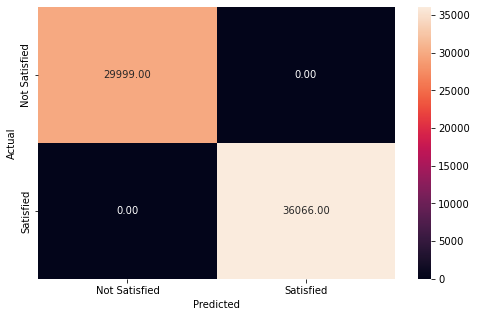

In [ ]:
y_pred_train1 = dt.predict(X_train)

metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     12787
           1       0.93      0.93      0.93     15527

    accuracy                           0.93     28314
   macro avg       0.93      0.93      0.93     28314
weighted avg       0.93      0.93      0.93     28314



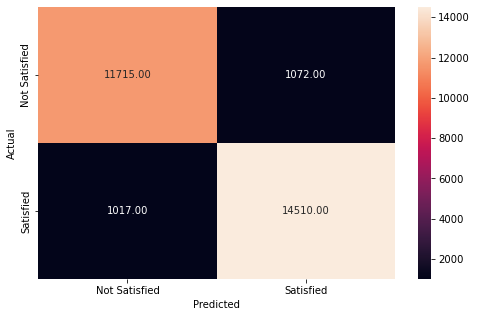

In [ ]:
y_pred_test1 = dt.predict(X_test)

metrics_score(y_test, y_pred_test1)

In [ ]:
#Try hyperparameter tuning
# Choose the type of classifier 
dt_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(dt_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dt_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=8, min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     29999
           1       0.88      0.97      0.92     36066

    accuracy                           0.91     66065
   macro avg       0.92      0.91      0.91     66065
weighted avg       0.92      0.91      0.91     66065



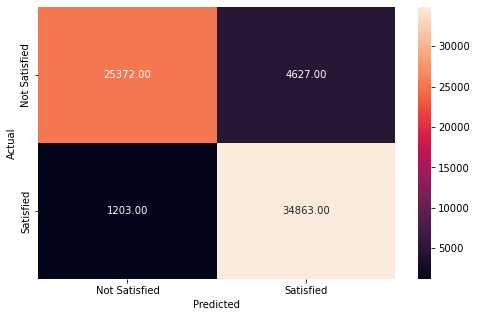

In [ ]:
y_pred_train2 = dt_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     12787
           1       0.88      0.97      0.92     15527

    accuracy                           0.91     28314
   macro avg       0.92      0.91      0.91     28314
weighted avg       0.91      0.91      0.91     28314



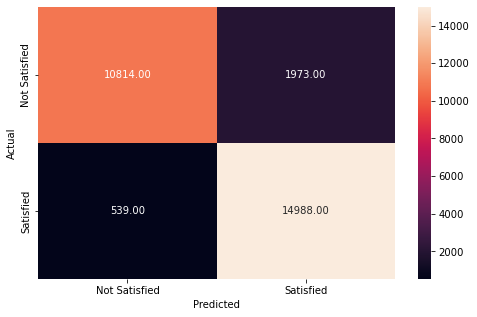

In [ ]:
y_pred_test2 = dt_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

In [ ]:
test.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,...,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender_num,Customer_Type_num,Type_Travel_num,Travel_Class_num,Seat_Class_num,Overall_Experience
0,99900001,36.0,532,0.0,0.0,4,4,4,4,3,...,6,5,6,2,0,1,0,0,0,1
1,99900002,21.0,1425,9.0,28.0,1,5,2,4,4,...,5,4,6,4,0,0,0,0,1,1
2,99900003,60.0,2832,0.0,0.0,6,6,6,6,6,...,3,5,3,6,1,1,0,0,1,1
3,99900004,29.0,1352,0.0,0.0,4,6,4,6,2,...,6,6,6,2,0,1,1,1,0,0
4,99900005,18.0,1610,17.0,0.0,6,1,6,3,6,...,6,6,6,6,1,0,0,0,1,1


In [ ]:
predict_test = dt_tuned.predict(test)

In [ ]:
test['Overall_Experience'] = predict_test

In [ ]:
submit_dt = test.iloc[:,[0,24]]
submit_dt.head(3)

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1


In [ ]:
submit_dt.to_csv("submit_dt.csv")